在这份文件中采用的是 NMI 和 ECS

第一行是 NMI  第二行是 ECS

第一列是 Euclidean 第二列是 Spherical

没有做截断

对不同方法做了比较

In this file, we use NMI and ECS

The first row is NMI; the second row is ECS

The first column is Euclidean; The first column is Spherical

In [1]:
import os

import pandas as pd

def load_data(disturb_type: int, N, dim, mu):
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "7Node2Vec"]
    MEAN = {}
    
    for method in methods:
        if disturb_type==1:
            folder_name = f"Stoch_{N}_{method}"
            file_name = f"Stoch_{N}_{mu}_{dim}dim_{method}" + "_MEAN.csv"
        elif disturb_type==2:
            folder_name = f"Btwn_{N}_{method}"   
            file_name = f"Btwn_{N}_{mu}_{dim}dim_{method}" + "_MEAN.csv"
        elif disturb_type==3:
            folder_name = f"Trans_{N}_{method}"   
            file_name = f"Trans_{N}_{mu}_{dim}dim_{method}" + "_MEAN.csv"            
        elif disturb_type==4:
            folder_name = f"Deg_{N}_{method}"   
            file_name = f"Deg_{N}_{mu}_{dim}dim_{method}" + "_MEAN.csv"
        elif disturb_type==5:
            folder_name = f"Rank_{N}_{method}"   
            file_name = f"Rank_{N}_{mu}_{dim}dim_{method}" + "_MEAN.csv"
        elif disturb_type==6:
            folder_name = f"Trank_{N}_{method}"   
            file_name = f"Trank_{N}_{mu}_{dim}dim_{method}" + "_MEAN.csv"            
        file_path = os.path.join(folder_name, file_name)
        
        MEAN[method] = pd.read_csv(file_path, header=None, sep=' ')
        MEAN[method] = MEAN[method]
        
    return MEAN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def format_percentage(x, pos):
    return f'{int(x * 100)}'

def Plot(disturb_type:int, N, dim, mu):
    MEAN = load_data(disturb_type=disturb_type, N=N, dim=dim, mu=mu)

    #methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "7Node2Vec"]
    
    # Define a marker dictionary to map mu values to marker styles
    markers = {
    "1HOPE": 'o',
    "2LAP": 's',
    "3LLE": 'D',
    "4DeepWalk": '^',
    "5MNMF": 'p',
    "6LINE": 'H',
    "7Node2Vec": '*'
    }
    
    # Color Universal Design (CUD) palette
    cud_palette = {
        "1HOPE": '#006FA9',  # Blue
        "2LAP": '#FF6400',    # Orange
        "3LLE": '#A16CFF',    # Purple
        "4DeepWalk": '#75B700',    # Lime green
        "5MNMF": '#009E73',    # Green
        "6LINE": '#93003A',    # Maroon
        "7Node2Vec": '#CC79A7',    # Magenta
    }
    
    
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))

    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    
    for method in methods:
        x_MEAN_0 = np.arange(0, len(MEAN[method][0])) * 0.1
        x_MEAN_1 = np.arange(0, len(MEAN[method][1])) * 0.1
        x_MEAN_2 = np.arange(0, len(MEAN[method][2])) * 0.1
        x_MEAN_3 = np.arange(0, len(MEAN[method][3])) * 0.1
        
        axes[0, 0].plot(x_MEAN_0, MEAN[method][0], label=method, color=cud_palette[method], marker=markers[method])
        axes[0, 1].plot(x_MEAN_1, MEAN[method][1], label=method, color=cud_palette[method], marker=markers[method])
        axes[1, 0].plot(x_MEAN_2, MEAN[method][2], label=method, color=cud_palette[method], marker=markers[method])
        axes[1, 1].plot(x_MEAN_3, MEAN[method][3], label=method, color=cud_palette[method], marker=markers[method])
    for ax in axes.flatten():
        ax.set_aspect('equal')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x * 100*0.3)}'))


    plt.subplots_adjust(wspace=0, hspace=0)

    fig.text(0.46, 0.55, '(a)', fontsize=18)
    fig.text(0.91, 0.55, '(b)', fontsize=18)
    fig.text(0.46, 0.15, '(c)', fontsize=18)
    fig.text(0.91, 0.15, '(d)', fontsize=18)

    fig.text(0.55, 0.05, 'Percentage of Removed Nodes', ha='center', fontsize=15)
    fig.text(0.03, 0.525, 'NMI or ECS', va='center', rotation='vertical', fontsize=15)

    for ax in axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        
    handles, labels = axes[0, 0].get_legend_handles_labels()

    fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=14, bbox_to_anchor=(0.54, 0.999), columnspacing=0.55)

    plt.tight_layout(rect=[0.05, 0.08, 1, 0.93])

    if disturb_type==1:
        file_name = f"Method_Compare_Stoch_{N}_{mu}_{dim}.png"
    elif disturb_type==2:
        file_name = f"Method_Compare_Btwn_{N}_{mu}_{dim}.png"
    elif disturb_type==3:
        file_name = f"Method_Compare_Trans_{N}_{mu}_{dim}.png"        
    elif disturb_type==4:
        file_name = f"Method_Compare_Deg_{N}_{mu}_{dim}.png"
    elif disturb_type==5:
        file_name = f"Method_Compare_Rank_{N}_{mu}_{dim}.png"  
    elif disturb_type==6:
        file_name = f"Method_Compare_Trank_{N}_{mu}_{dim}.png"        
    plt.savefig(file_name)    
    print(file_name)
    plt.show()


Method_Compare_Stoch_986_0.01_16.png


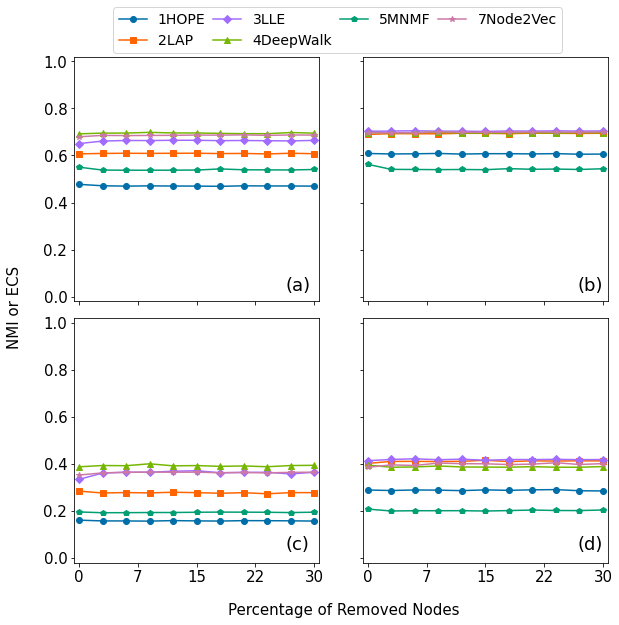

In [3]:
disturb_type = 1
N = 986
dim = 16

Plot(disturb_type=disturb_type, N=N, dim = dim, mu=0.01)
# In our plots, the first row is NMI similarities and the second row is ECS measurements.
# In our plots, the first column is using Euclidean distance, and the second column is using Spherical distance.
# 横轴比例为 千分之几
# The horizontal axis coordinates are in per mille.

Method_Compare_Stoch_986_0.01_32.png


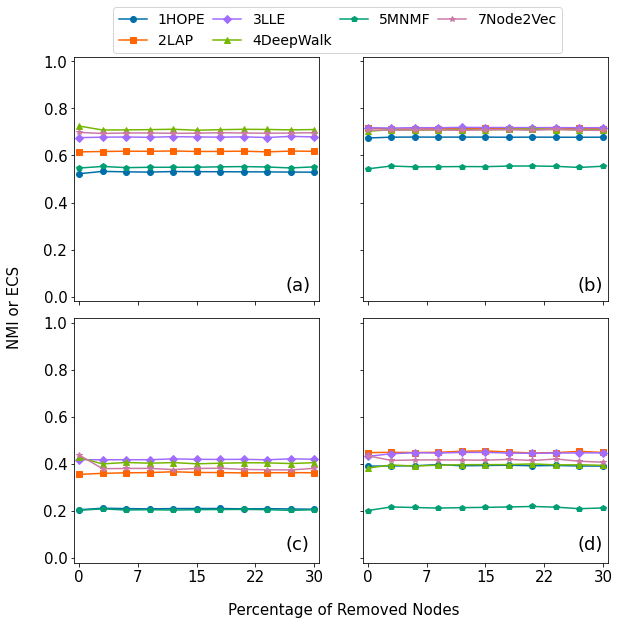

In [4]:
disturb_type = 1
N = 986
dim = 32

Plot(disturb_type=disturb_type, N=N, dim = dim, mu=0.01)
# In our plots, the first row is NMI similarities and the second row is ECS measurements.
# In our plots, the first column is using Euclidean distance, and the second column is using Spherical distance.
# 横轴比例为 千分之几
# The horizontal axis coordinates are in per mille.